In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train_data = np.load('X_kannada_MNIST_train.npz')
X_train = X_train_data['arr_0']


In [3]:
y_train_data = np.load('y_kannada_MNIST_train.npz')
y_train = y_train_data['arr_0']



In [4]:
X_test_data = np.load('X_kannada_MNIST_test.npz')
X_test = X_test_data['arr_0']


In [5]:
y_test_data = np.load('y_kannada_MNIST_test.npz')
y_test = y_test_data['arr_0']

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

In [10]:
X_train_reshape = X_train.reshape(X_train.shape[0], 784)
X_test_reshape = X_test.reshape(X_test.shape[0], 784)


In [11]:
X_train_reshape.shape

(60000, 784)

In [12]:
X_train_reshape

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [13]:
X_test_reshape

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [14]:
x_train = pd.DataFrame(X_train_reshape)
x_test = pd.DataFrame(X_test_reshape)


In [15]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# ploting the hand written image randomly

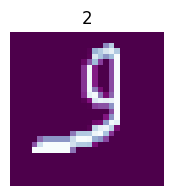

In [17]:
def plot_random_digit():
  random_index = np.random.randint(0,X_train.shape[0])
  plt.imshow(X_train[random_index], cmap='BuPu_r')
  plt.title(y_train[random_index])
  plt.axis('off')
plt.figure(figsize=[2,2])
plot_random_digit()

## performing PCA to 25 components.

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=25)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
x_train_pca = pd.DataFrame(x_train_pca)
x_test_pca = pd.DataFrame(x_test_pca)



In [19]:
x_train_pca

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,603.287390,-265.967106,29.543541,-322.437661,297.645874,124.933285,-101.679497,-40.176388,381.194499,-189.131992,...,259.281130,170.693130,-233.217049,-162.994718,180.770816,-91.030664,-78.714935,-80.108110,-79.255266,-20.933242
1,298.508142,-97.544828,53.099867,-549.041855,42.398245,-313.901893,-219.933400,244.019444,253.381841,261.286510,...,-173.061582,346.876327,21.917226,89.302884,68.046641,-22.791838,57.348725,-211.873161,163.427875,-64.919964
2,-425.622137,646.150361,433.612087,-152.566200,162.643178,195.897243,43.394282,-399.662686,347.050132,-129.357834,...,-55.558956,21.114844,307.459904,168.493518,-395.658070,88.956224,103.857280,158.752383,-52.926217,242.196640
3,-343.828554,100.668064,-415.924044,-8.474090,-103.484677,152.569750,-97.507164,-270.095504,-17.729973,158.533320,...,-82.429781,190.080609,-71.693166,-46.767957,-115.665084,-0.123915,66.543194,145.322733,29.165592,-25.747872
4,-96.056321,3.559567,-516.641368,125.602565,22.230651,80.809102,69.482759,-86.863347,158.581767,180.550835,...,165.675523,-116.427789,-6.903203,-147.096798,-78.979772,192.638072,-130.879046,5.067221,-285.830110,77.042961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-210.913976,384.412696,741.318195,144.939297,-227.952515,1.585449,337.744770,56.546031,-338.245097,-4.578968,...,36.022869,-355.408676,-80.844623,-205.602142,-160.667058,41.565949,-137.711708,258.945602,54.463357,-150.709604
59996,-411.839792,45.667471,127.140863,-205.793907,-377.402369,-242.375808,121.600543,-321.716507,151.290649,65.732427,...,7.540930,-35.586806,-92.955834,-148.777194,-103.878538,126.652737,-33.724557,72.959016,213.830442,-197.917987
59997,-568.865927,5.946112,470.637964,-351.488031,-287.227403,-116.243282,75.656159,-223.187642,149.740049,-164.305629,...,-135.510932,281.897893,-146.117475,-131.439956,-99.305300,169.220334,130.633812,3.612343,-152.172445,214.312321
59998,771.741991,-105.780682,296.497002,460.848213,-471.924980,-82.691433,-108.210928,-84.286924,72.100562,89.851072,...,-256.877839,195.412974,249.523613,-145.776909,-123.704894,-83.054426,23.433879,147.499224,-106.130096,-68.162122


In [20]:
x_test_pca

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,279.360127,-604.630944,-176.073273,-322.230809,749.389734,-78.005956,196.952986,238.714258,455.231916,-308.590483,...,160.962502,-53.921191,-214.541744,132.922953,320.265902,-8.502601,-227.275786,-101.258626,145.205359,34.703017
1,68.689918,-153.316917,-59.929886,-475.447732,305.786447,-400.518347,21.664919,303.829237,470.762083,-30.870277,...,-153.826506,81.623080,86.169050,-234.743036,-17.137504,-164.999287,-117.147621,-125.327411,-165.011021,6.850431
2,-173.920105,-101.756165,-158.922339,139.188665,564.145108,-69.084229,138.511269,398.042700,681.343979,252.100684,...,116.923854,-58.987820,-219.530140,-187.371380,180.406619,-73.359823,295.652843,-251.219860,-61.058319,115.289801
3,-258.215992,62.586132,-502.917324,-5.869567,390.681634,14.057112,-170.725684,109.815046,242.536083,-162.955470,...,176.625921,214.787836,-164.846227,23.961922,-18.724587,-86.818129,-74.977500,-238.684831,-94.738402,226.940047
4,-145.295068,51.348999,-517.376311,123.798530,140.383369,106.648383,156.060753,-316.210291,245.075838,151.572840,...,225.373404,240.266949,-192.862474,-28.730961,38.025840,-28.447839,-18.105493,88.383475,-32.318677,-80.860377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,34.943982,102.682919,-382.820464,274.520334,-39.783708,-123.439036,234.990278,195.951334,48.747217,-77.967063,...,113.529761,-82.082465,63.380942,-4.624192,-66.750369,29.931497,-235.369363,-189.359511,61.805756,60.708008
9996,-508.251359,-177.757921,-130.086202,23.491350,-105.807446,139.529487,-38.966969,-70.696189,89.463212,359.119164,...,-131.527487,-223.548379,35.429168,-44.136079,37.599458,73.778999,-53.143953,143.300610,-98.660205,-170.491350
9997,-541.203945,27.851746,55.254058,-84.474460,292.474651,185.018664,-75.187553,51.671076,86.087912,-1.028528,...,-127.109644,33.442899,-267.208150,63.228660,-174.752597,116.074425,49.501341,-373.702911,17.742572,-31.752420
9998,648.876451,-49.691677,161.243724,-162.887291,-336.359987,37.118583,260.119525,-26.042782,51.390509,135.153604,...,-205.901622,310.545470,-115.888188,210.866856,-81.337941,104.763894,88.576363,274.833826,109.843228,-84.721992


# Normalizing  the data

In [21]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(x_train_pca)
transformed_train_data = mm.transform(x_train_pca)
transformed_test_data = mm.transform(x_test_pca)
x_pca_train_trans = pd.DataFrame(transformed_train_data)
x_pca_test_trans = pd.DataFrame(transformed_test_data)

In [22]:
x_pca_train_trans.describe()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.494385,0.352083,0.393206,0.441501,0.426625,0.469478,0.433480,0.429776,0.481283,0.493076,...,0.443759,0.452169,0.451002,0.461143,0.479057,0.464962,0.437600,0.474434,0.453757,0.457056
std,0.169977,0.137099,0.170133,0.142875,0.128648,0.133331,0.129761,0.135435,0.126805,0.123165,...,0.113270,0.113455,0.113179,0.112963,0.118868,0.101111,0.114375,0.115556,0.118404,0.116936
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.364023,0.263934,0.253559,0.345208,0.349895,0.369757,0.337725,0.331106,0.395652,0.410157,...,0.367756,0.377329,0.375774,0.383067,0.399000,0.399123,0.359525,0.396876,0.373084,0.378763
50%,0.503940,0.335521,0.385296,0.443891,0.429619,0.464238,0.432739,0.423800,0.479552,0.494830,...,0.439321,0.453327,0.452142,0.459341,0.480330,0.466713,0.434676,0.475264,0.454033,0.454990
75%,0.618434,0.405256,0.525669,0.535899,0.508288,0.568322,0.527390,0.521684,0.560962,0.577099,...,0.515090,0.527031,0.526873,0.538884,0.559347,0.530604,0.513419,0.552156,0.534850,0.533209
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## • K-NN Classifier model

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn_pca = KNeighborsClassifier()
params = {'n_neighbors': range(3,10),
          'weights':['uniform', 'distance'],
          'metric':['manhattan','eculidean','cosine']}
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
skf = StratifiedKFold(n_splits = 5)

rcv_knn = RandomizedSearchCV(knn_pca, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv_knn.fit(x_pca_train_trans, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['manhattan', 'eculidean',
                                                   'cosine'],
                                        'n_neighbors': range(3, 10),
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [24]:
rcv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan'}

In [25]:
rcv_knn.best_score_

0.9643

In [26]:
finalmodel_knn_mnist = knn_pca.set_params(**rcv_knn.best_params_)
finalmodel_knn_mnist.fit(x_pca_train_trans, y_train)
knnpreds_mnist = finalmodel_knn_mnist.predict(x_pca_test_trans)

## Evaluation (KNN)

Precision: 0.9260066968238375
Recall: 0.922
F1-score: 0.9216320930806106
Confusion Matrix:
[[806 159   1  10   6   0   0   2  13   3]
 [  3 979   0   2   5   0   1   1   6   3]
 [  2   0 991   1   1   2   3   0   0   0]
 [  8   9   2 924  20  22   1  14   0   0]
 [  0   0   0   3 984   5   0   1   2   5]
 [  0   1   2   7  96 889   2   1   1   1]
 [  2   2   0   6  30   7 917  22   0  14]
 [  7   1   0  31  33   3  79 814   1  31]
 [ 22   4   0   0   2   4   1   0 961   6]
 [  1   9   0   1   9   1   4   5  15 955]]
AUC : 0.9802957094444444


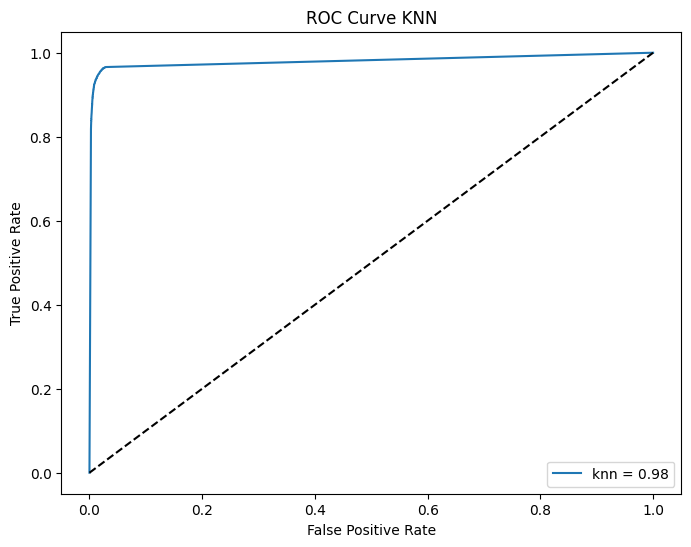

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, knnpreds_mnist,average = 'macro')
recall = recall_score(y_test, knnpreds_mnist,average = 'macro')
f1 = f1_score(y_test, knnpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,knnpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

#calculate AUC

from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_knn = finalmodel_knn_mnist.predict_proba(x_pca_test_trans)
fpr_knn,tpr_knn,thersholds_knn = roc_curve(y_test_bin.ravel(),predict_proba_knn.ravel())
auc = auc(fpr_knn,tpr_knn)

print("AUC :", auc)

# plotting ROC curve

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'knn = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve KNN')
plt.legend(loc='lower right')
plt.show()

## DECISION TREES

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
model =  DecisionTreeClassifier()

params = {'criterion':['gini','entropy'],
          'splitter':['best','random'],
          'max_depth':range(3,50),
          }

skf = StratifiedKFold(n_splits = 5)

rcv_dt = RandomizedSearchCV(model, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv_dt.fit(x_pca_train_trans, y_train)

rcv_dt.best_score_


0.8943833333333332

In [29]:
rcv_dt.best_params_

{'splitter': 'best', 'max_depth': 41, 'criterion': 'entropy'}

In [30]:
finalmodel_dt_mnist = model.set_params(**rcv_dt.best_params_)
finalmodel_dt_mnist.fit(x_pca_train_trans, y_train)
dtpreds_mnist = finalmodel_dt_mnist.predict(x_pca_test_trans)

## EVALUATION (DECISION TREE)

Precision: 0.8193567651587671
Recall: 0.8186
F1-score: 0.8180039705082907
Confusion Matrix:
[[736 154  13  22  11   2   2  13  30  17]
 [ 68 828   4  21   5  16   7  11  20  20]
 [  4   3 933  11   9  15   9   6   6   4]
 [ 16  14   7 794  38  26  26  58   9  12]
 [  3   1   4  38 840  49  18   7  13  27]
 [  3  11   8  22 114 795   7   6  13  21]
 [ 10  16   2  32  17  23 816  50   7  27]
 [ 12  10   6  49  33   8 119 700   8  55]
 [ 55  25   8   2   4  13   5   3 875  10]
 [ 12  26   6   0  16   7   7   9  48 869]]
AUC: 0.8992222222222221


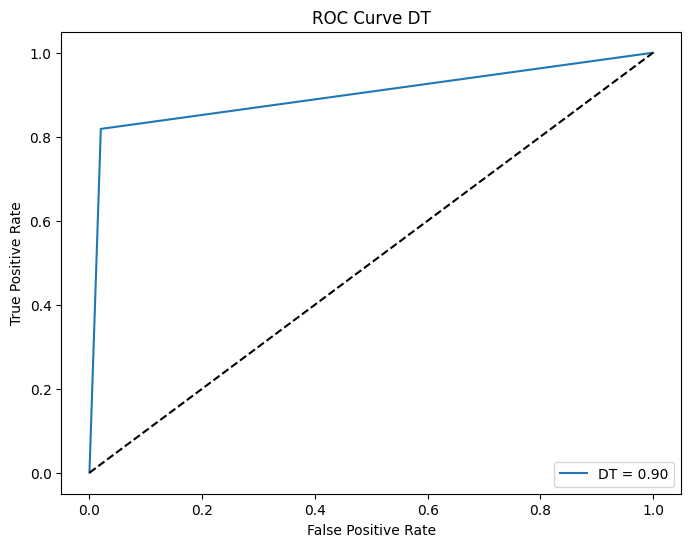

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, dtpreds_mnist,average = 'macro')
recall = recall_score(y_test, dtpreds_mnist,average = 'macro')
f1 = f1_score(y_test, dtpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,dtpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_dt =  finalmodel_dt_mnist.predict_proba(x_pca_test_trans)
fpr_dt,tpr_dt,thersholds_dt = roc_curve(y_test_bin.ravel(),predict_proba_dt.ravel())
auc = auc(fpr_dt,tpr_dt)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'DT = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve DT')
plt.legend(loc='lower right')
plt.show()


## RANDOM FOREST

# On non- normalized data

Precision: 0.9035462211620938
Recall: 0.9007
F1-score: 0.9000507543098116
Confusion Matrix:
[[808 145   1  20   3   0   2   2  16   3]
 [ 17 930   1  20   6   4   0   0  13   9]
 [  3   1 984   2   0   7   1   1   1   0]
 [ 10   6   2 926  14  17   6  17   2   0]
 [  0   0   0  18 942  20   2   4   7   7]
 [  0   0   0   9  90 885   3   5   5   3]
 [  4   5   3  27  18  23 886  13   2  19]
 [  5   9   1  34  22   1 107 768   7  46]
 [ 16   5   1   1   3   3   1   1 967   2]
 [  3   5   0   0  16   1   9   2  53 911]]
AUC: 0.9936122966666667


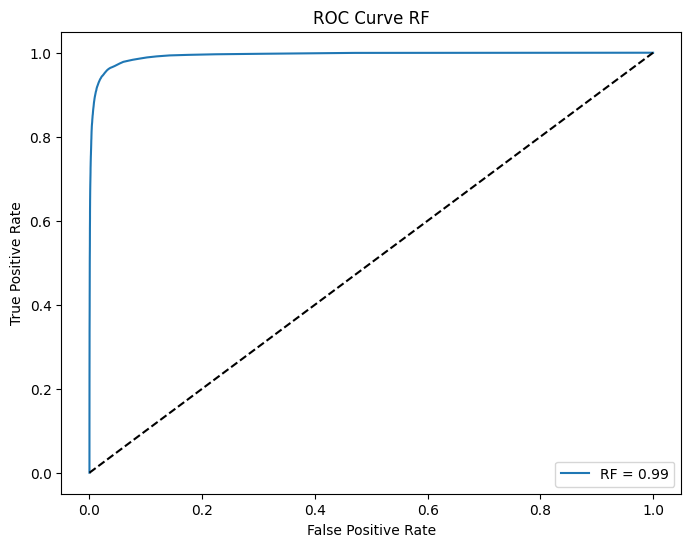

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_mnist = RandomForestClassifier()
rf_mnist.fit(x_train_pca, y_train)
rfpreds_mnist = rf_mnist.predict(x_test_pca)


## Evaluation
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, rfpreds_mnist,average = 'macro')
recall = recall_score(y_test, rfpreds_mnist,average = 'macro')
f1 = f1_score(y_test, rfpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,rfpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_rf = rf_mnist.predict_proba(x_test_pca)
fpr_rf,tpr_rf,thersholds_rf = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_rf,tpr_rf)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'RF = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RF')
plt.legend(loc='lower right')
plt.show()


# On Normalized data

Precision: 0.9058262078880501
Recall: 0.9029
F1-score: 0.9023922406883736
Confusion Matrix:
[[812 141   1  23   4   0   2   2  12   3]
 [ 15 932   1  26   6   2   0   0  13   5]
 [  3   1 986   2   0   5   1   1   1   0]
 [  9   7   1 925  16  15   4  19   4   0]
 [  0   1   0  23 942  16   2   2   9   5]
 [  0   0   0  10  98 878   2   5   5   2]
 [  3   4   2  22  20  25 887  17   2  18]
 [  7   9   0  31  24   2  99 781   7  40]
 [ 16   3   1   1   2   5   2   0 969   1]
 [  4   4   0   0  13   0   8   2  52 917]]
AUC: 0.99360275


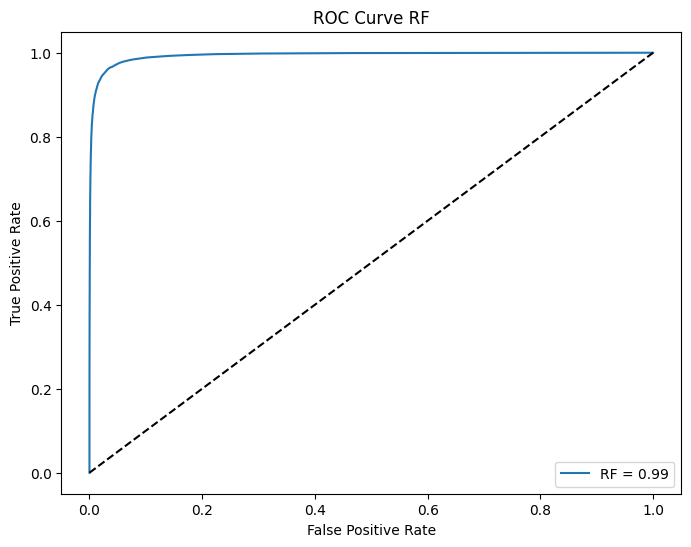

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_mnist = RandomForestClassifier()
rf_mnist.fit(x_pca_train_trans, y_train)
rfpreds_mnist = rf_mnist.predict(x_pca_test_trans)


## Evaluation
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, rfpreds_mnist,average = 'macro')
recall = recall_score(y_test, rfpreds_mnist,average = 'macro')
f1 = f1_score(y_test, rfpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,rfpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_rf = rf_mnist.predict_proba(x_pca_test_trans)
fpr_rf,tpr_rf,thersholds_rf = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_rf,tpr_rf)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'RF = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RF')
plt.legend(loc='lower right')
plt.show()


# OPTIMIZED MODEL

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
rf_mnist = RandomForestClassifier()

params = {'criterion':['gini','entropy'],
          'n_estimators': range(1,10),
          'max_features':['sqrt', 'log2', None]
          # 'max_depth':range(3,50),
          }



skf = StratifiedKFold(n_splits = 10)

rcv = RandomizedSearchCV(rf_mnist, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv.fit(x_pca_train_trans, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': range(1, 10)},
                   scoring='accuracy')

In [35]:
rcv.best_params_

{'n_estimators': 7, 'max_features': 'sqrt', 'criterion': 'entropy'}

In [36]:
rcv.best_score_

0.9367999999999999

In [37]:
finalmodel_rf = rf_mnist.set_params(**rcv.best_params_)
finalmodel_rf.fit(x_pca_train_trans, y_train)
rfpreds_mnist = finalmodel_rf.predict(x_pca_test_trans)

Precision: 0.8740788291834756
Recall: 0.8709
F1-score: 0.870593194922215
Confusion Matrix:
[[810 132   5  19   6   0   2   1  20   5]
 [ 48 892   2  24   8   7   2   1   9   7]
 [  5   2 972   8   1   8   0   1   2   1]
 [ 14   6   3 907  19  10  10  25   6   0]
 [  2   0   0  39 913  23   3   4   6  10]
 [  0   7   6  18 108 841   3   7   5   5]
 [  7   9   2  43  18  24 852  30   3  12]
 [ 20  13   4  51  39   4  94 740   5  30]
 [ 42  16  10   4   3  11   1   1 908   4]
 [ 12  18   1   2  24   3   5   4  57 874]]
AUC: 0.9778891122222221


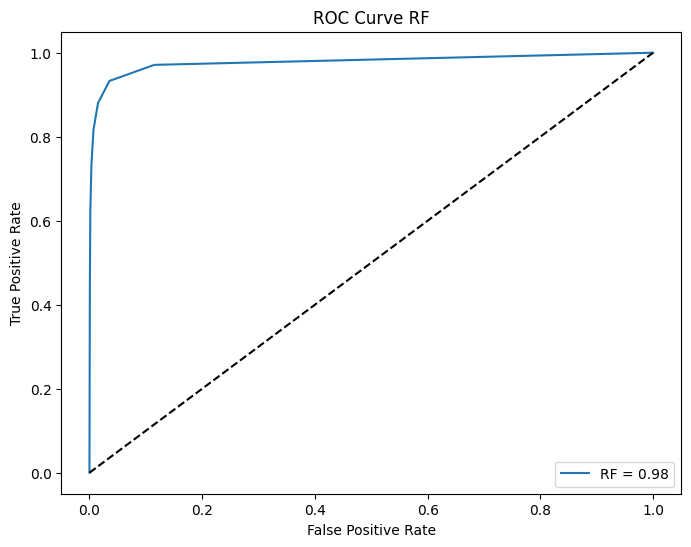

In [38]:
## Evaluation
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, rfpreds_mnist,average = 'macro')
recall = recall_score(y_test, rfpreds_mnist,average = 'macro')
f1 = f1_score(y_test, rfpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,rfpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_rf = finalmodel_rf.predict_proba(x_pca_test_trans)
fpr_rf,tpr_rf,thersholds_rf = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_rf,tpr_rf)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'RF = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RF')
plt.legend(loc='lower right')
plt.show()

## Naive Bayes

Precision: 0.8092887124211459
Recall: 0.8059999999999998
F1-score: 0.8046872022243408
Confusion Matrix:
[[628 232  18  44  11   0   2  12  47   6]
 [ 11 824   4  87  10   4   0   1  49  10]
 [ 10   1 980   3   0   3   2   0   0   1]
 [ 16  10   2 813  34  16  17  92   0   0]
 [  2   0   0  20 885  31   4  25  26   7]
 [  0   1   5  24 158 762   5  26  16   3]
 [  5   6  38  13  24  47 807  48   0  12]
 [ 11   9   7  45  31   2 177 699   4  15]
 [ 94  28  19   2   2   8   1   4 835   7]
 [  8   7   2   1  23   0   8  14 110 827]]
AUC: 0.9768153


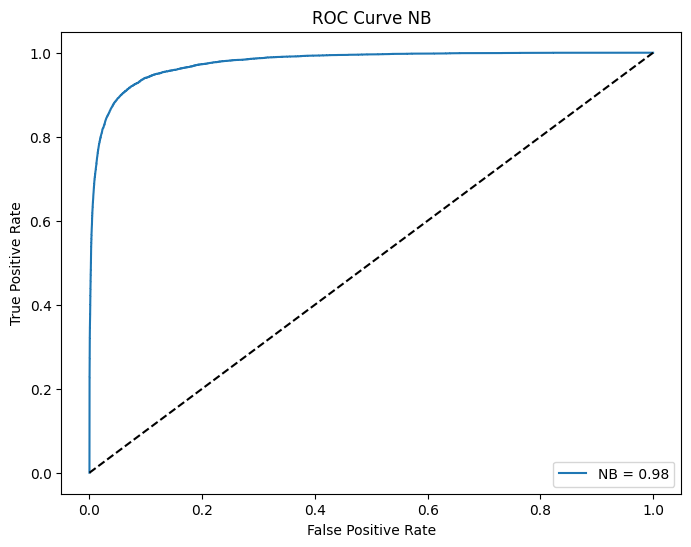

In [39]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_pca_train_trans, y_train)

predictions_nb = naive_bayes.predict(x_pca_test_trans)

## Evaluation

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions_nb,average = 'macro')
recall = recall_score(y_test, predictions_nb,average = 'macro')
f1 = f1_score(y_test, predictions_nb,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,predictions_nb)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_rf = naive_bayes.predict_proba(x_pca_test_trans)
fpr_nb,tpr_nb,thersholds_nb = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_nb,tpr_nb)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'NB = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve NB')
plt.legend(loc='lower right')
plt.show()


## SVM

Precision: 0.9385673363422846
Recall: 0.9368000000000001
F1-score: 0.9365455401103342
Confusion Matrix:
[[858 112   0  12   2   0   0   1   9   6]
 [ 13 964   0  10   3   0   1   1   5   3]
 [  3   0 993   1   0   0   1   1   1   0]
 [  5   5   2 934  20  17   5  12   0   0]
 [  1   0   0   8 971   6   3   0   5   6]
 [  0   0   0   7  69 917   1   2   4   0]
 [  2   0   2   5  18  14 937   6   0  16]
 [ 17   6   1  22  18   1  52 848   0  35]
 [  7   3   0   0   1   3   1   0 983   2]
 [  5   8   0   0   5   0   2   1  16 963]]
AUC: 0.9768153


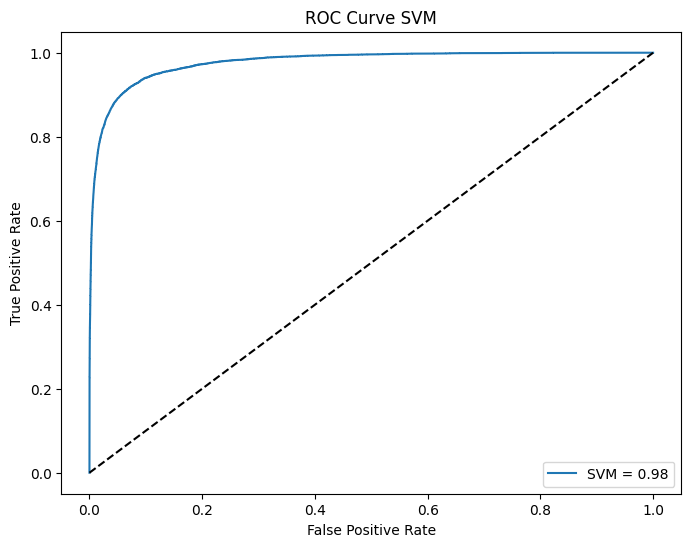

In [40]:
from sklearn.svm import SVC

svc_mnist= SVC(probability = True)
svc_mnist.fit(x_pca_train_trans, y_train)
predictions_svc = svc_mnist.predict(x_pca_test_trans)

## Evaluation
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions_svc,average = 'macro')
recall = recall_score(y_test, predictions_svc,average = 'macro')
f1 = f1_score(y_test, predictions_svc,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,predictions_svc)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_svc = svc_mnist.predict_proba(x_pca_test_trans)
fpr_svc,tpr_svc,thersholds_svc = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_svc,tpr_svc)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, label=f'SVM = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SVM')
plt.legend(loc='lower right')
plt.show()